## Final Project: Phase 1
Spring 2024  
Group: Michael Massone and Nelson Farrell   
DS 5230 Unsupervised Machine Learning  
Professor Steven Morin, PhD  
Due: 01/21/2024  
___


### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import sys
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

___
### Define File Paths

In [2]:
# define path
nb_path = Path(os.getcwd())
print(nb_path)
path = str(nb_path.parent)
print(path)

# path to figs folder
figs_path = path + '/figs'

# path to data
data_path= path + '/data'

# path to src folder
src_path = path + '/src'
print(src_path)

# sys path
sys.path.append(src_path)

/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/notebooks
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/src


___

### Functions

In [3]:
from data_id_vector import check_for_id_matrix
from read_in_data import read_data

/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/notebooks
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/data/raw/Dry_Bean_Dataset.arff


___
### Parameters

In [10]:
target = 'Class'

___
### Load Data

In [5]:
df = read_data()

/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/notebooks
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/data/raw/Dry_Bean_Dataset.arff


___
### Display Dataset General Information

In [6]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'
5,30279.0,634.927,212.560556,181.510182,1.171067,0.520401,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,b'SEKER'
6,30477.0,670.033,211.050155,184.039050,1.146768,0.489478,30970.0,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,b'SEKER'
7,30519.0,629.727,212.996755,182.737204,1.165591,0.513760,30847.0,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,b'SEKER'
8,30685.0,635.681,213.534145,183.157146,1.165852,0.514081,31044.0,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,b'SEKER'
9,30834.0,631.934,217.227813,180.897469,1.200834,0.553642,31120.0,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,b'SEKER'


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
# display the shape of the df
df.shape

(13611, 17)

___
### Check for Missing Values in Target Vector

In [11]:
#check number Nan in target vector
df[target].isna().sum()

0

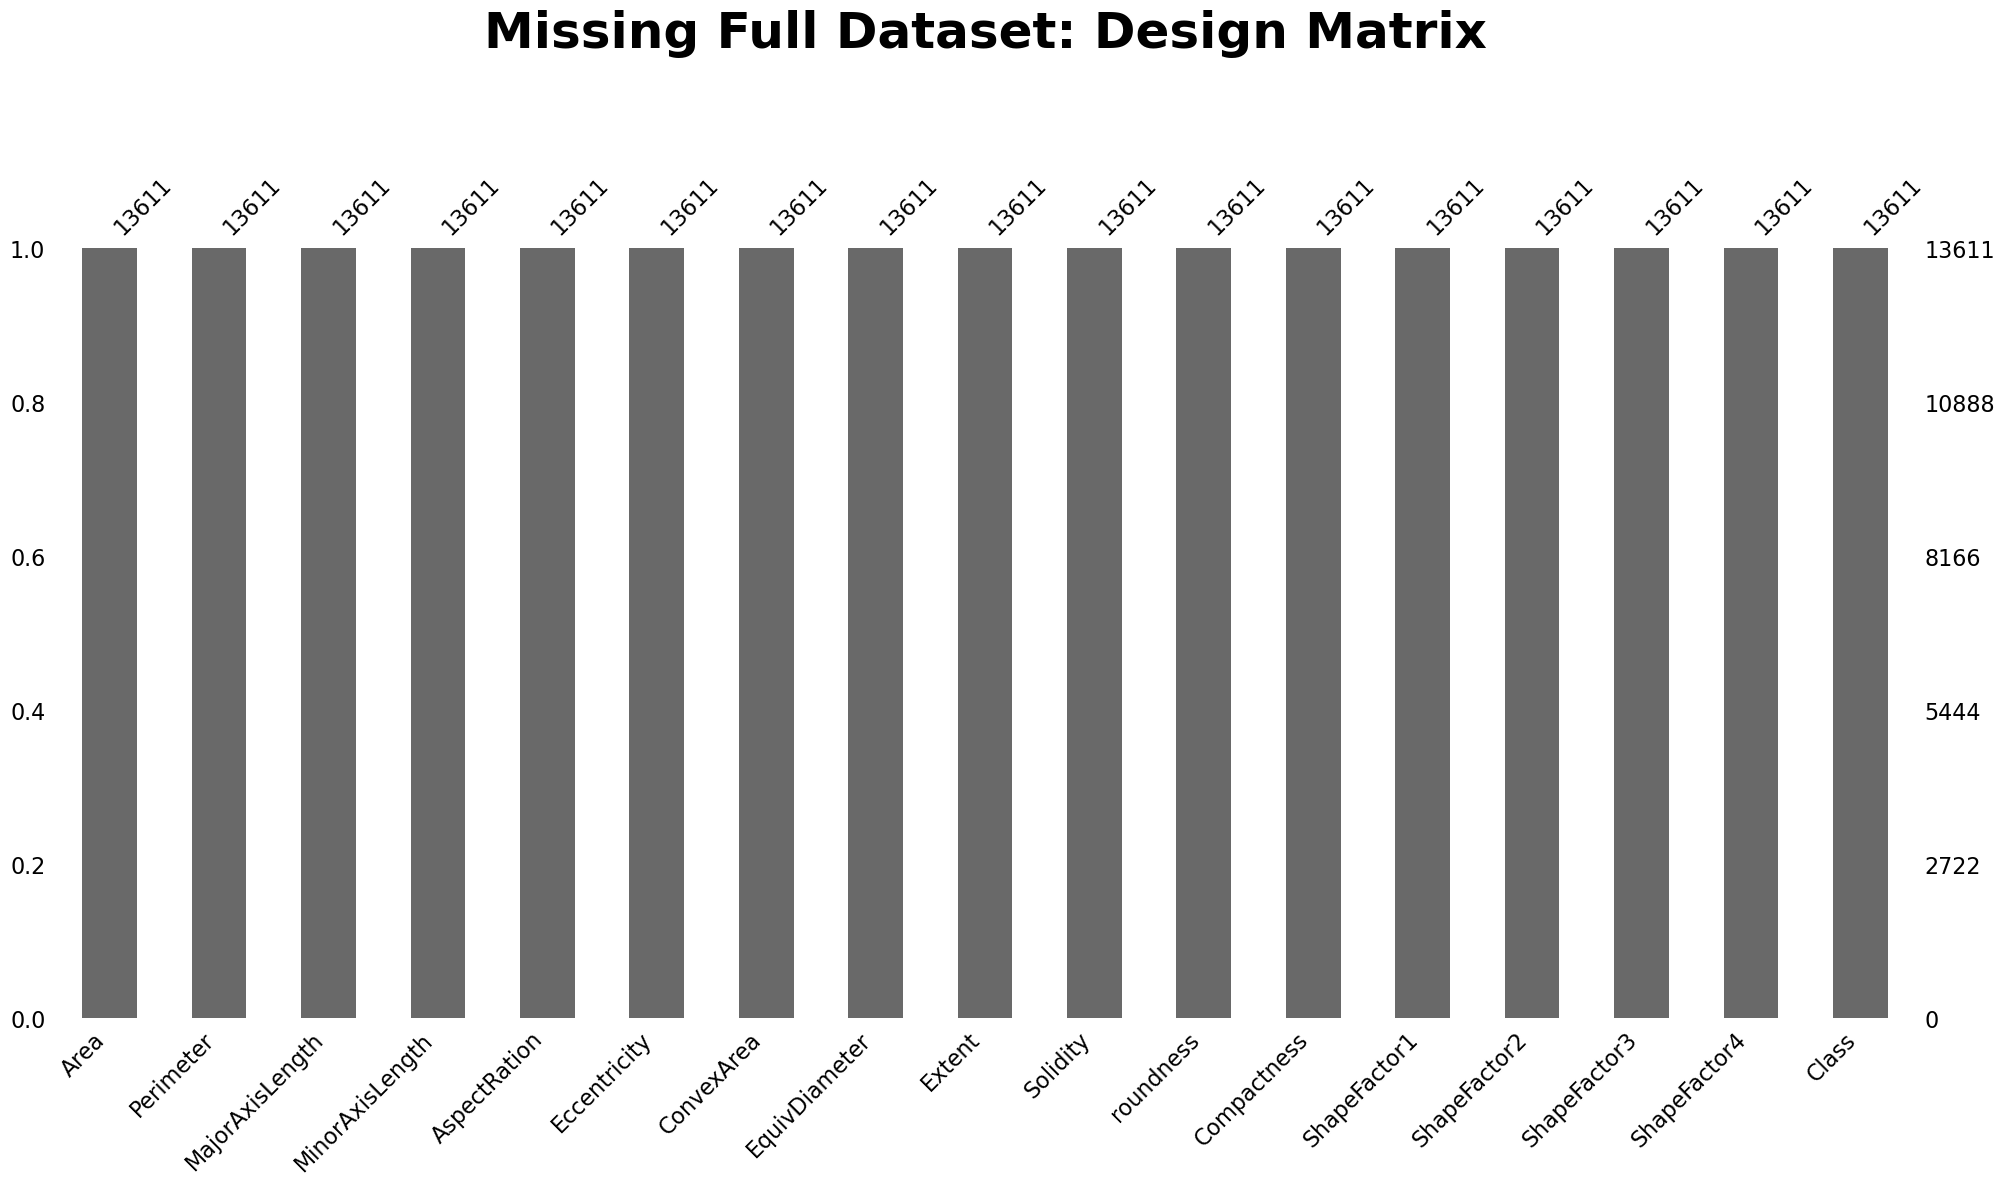

In [12]:
# display missing values
msno.bar(df)
plt.title("Missing Full Dataset: Design Matrix", fontsize = 36, weight = 'bold', y = 1.25);

# save fig
plt.savefig(figs_path + "/missingness_full_dataset.png", bbox_inches = 'tight')

___
### Check for ID Attribute

In [13]:
check_for_id_matrix(df)

Number of Rows: 13611
Original dataframe does not contain ID column.


___
### Add ID Attribute

In [14]:
df['id'] = range(0, df.shape[0])
print(df.id)
df.head()

0            0
1            1
2            2
3            3
4            4
         ...  
13606    13606
13607    13607
13608    13608
13609    13609
13610    13610
Name: id, Length: 13611, dtype: int64


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,id
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER',0
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER',1
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER',2
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER',3
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER',4


___
### Arrange Columns

In [15]:
df.insert(0, 'id', df.pop('id'))
df.head()

,id,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'


___

## Target Vector

### Separate Target

In [16]:
target_df = df[['id', target]].copy()
target_df

,id,Class
0,0,b'SEKER'
1,1,b'SEKER'
2,2,b'SEKER'
3,3,b'SEKER'
4,4,b'SEKER'
...,...,...
13606,13606,b'DERMASON'
13607,13607,b'DERMASON'
13608,13608,b'DERMASON'
13609,13609,b'DERMASON'


### Display the Number of Classes in the Target Vector

In [17]:
num_classes = target_df[target].nunique()
print(f'Number of classes in target vector: {num_classes}')

Number of classes in target vector: 7


___
### Map Target Vector Strings to Numerical Values

In [18]:
# instantiate encoder
le = LabelEncoder()

# encode target column
target_df['target_encoded'] = le.fit_transform(df[target])

# extract the precise mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# print mapping formula
print(mapping)

# extract mapped values and id
target_df = target_df[['id', 'target_encoded']]

{b'BARBUNYA': 0, b'BOMBAY': 1, b'CALI': 2, b'DERMASON': 3, b'HOROZ': 4, b'SEKER': 5, b'SIRA': 6}


### Mapping Key:  
**The mapping procedure is as follows:**   
* ```b'BARBUNYA'```$ = 0$ 
* ```b'BOMBAY'```$ =  1$ 
* ```b'CALI'```$ = 2$
* ```b'DERMASON'```$ = 3$
* ```b'HOROZ'```$ = 4$
* ```b'SEKER'```$ = 5$ 
* ```b'SIRA'```$= 6$
 

___
### Save Target Vector


In [19]:
# save the target vector
target_df.to_csv(data_path + '/curated/beans_target.csv')
print(f"Target dataframe saved at: {data_path}/curated/beans_target.csv")

Target dataframe saved at: /Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/data/curated/beans_target.csv


___
## Design Matrix

### Seperate Design Matrix



In [20]:
# make list of all columns
cols = list(df.columns)

# make new list without target
design_cols = [item for item in cols if item != target]

# create design df
design_df = df[design_cols].copy()

# display design_df info
print(design_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13611 non-null  int64  
 1   Area             13611 non-null  float64
 2   Perimeter        13611 non-null  float64
 3   MajorAxisLength  13611 non-null  float64
 4   MinorAxisLength  13611 non-null  float64
 5   AspectRation     13611 non-null  float64
 6   Eccentricity     13611 non-null  float64
 7   ConvexArea       13611 non-null  float64
 8   EquivDiameter    13611 non-null  float64
 9   Extent           13611 non-null  float64
 10  Solidity         13611 non-null  float64
 11  roundness        13611 non-null  float64
 12  Compactness      13611 non-null  float64
 13  ShapeFactor1     13611 non-null  float64
 14  ShapeFactor2     13611 non-null  float64
 15  ShapeFactor3     13611 non-null  float64
 16  ShapeFactor4     13611 non-null  float64
dtypes: float64(1

___ 
### Determine the Size of the Design Matrix

In [21]:
# determine size of the design matrix
design_matrix_size = design_df.shape

# display
print(f'Design Matrix Size: {design_matrix_size}')

Design Matrix Size: (13611, 17)


___
### Determine the Attribute Types of the Design Matrix

In [22]:
design_df.dtypes

id                   int64
Area               float64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
dtype: object

#### Features  
* ```Area``` (A) - ***float64 - Ratio*** - The area of a bean zone and the number of pixels within its boundaries.
* ```Perimeter``` (P) - ***float64 - Ratio*** - Bean circumference is defined as the length of its border.  
* ```MajorAxisLength```(L) - ***float64 - Ratio*** - The distance between the ends of the longest line that can be drawn from a bean.
* ```MinorAxisLength``` (l) - ***float64 - Ratio*** - The longest line that can be drawn from the bean while standing perpendicular to the main axis.
* ```AspectRatio``` (K) - ***float64 - Ratio*** - Defines the relationship between L and l.
* ```Eccentricity``` (Ec) - ***float64 - Ratio*** - Eccentricity of the ellipse having the same moments as the region.
*  ```ConvexArea``` (C) - ***float64 - Ratio*** - Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
* ```EquivDiameter``` (Ed) - ***float64 -*** Ratio - The diameter of a circle having the same area as a bean seed area.
* ```Extent``` (Ex) - ***float64 - Ratio -*** The ratio of the pixels in the bounding box to the bean area.
* ```Solidity``` (S) - ***float64 - Ratio -*** Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
* ```Roundness``` (R) - ***float64 - Ratio -*** Calculated with the following formula: $\frac{(4 \pi A)}{(P^2)}$
* ```Compactness``` (CO) - ***float64 - Ratio*** - Measures the roundness of an object: $\frac{Ed}{L}$
* ```ShapeFactor1``` (SF1) - ***float64 - Ratio***
* ```ShapeFactor2``` (SF2) - ***float64 - Ratio***
* ```ShapeFactor3``` (SF3) - ***float64 - Ratio*** 
* ```ShapeFactor4``` (SF4) - ***float64 - Ratio***


___
### Determine Missingness of Design Matrix

In [21]:
# find proportion of missing values
round(design_df.isna().sum()/design_df.shape[0], 3)

id                 0.0
Area               0.0
Perimeter          0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
AspectRation       0.0
Eccentricity       0.0
ConvexArea         0.0
EquivDiameter      0.0
Extent             0.0
Solidity           0.0
roundness          0.0
Compactness        0.0
ShapeFactor1       0.0
ShapeFactor2       0.0
ShapeFactor3       0.0
ShapeFactor4       0.0
dtype: float64

In [22]:
design_df.isna().sum()

id                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

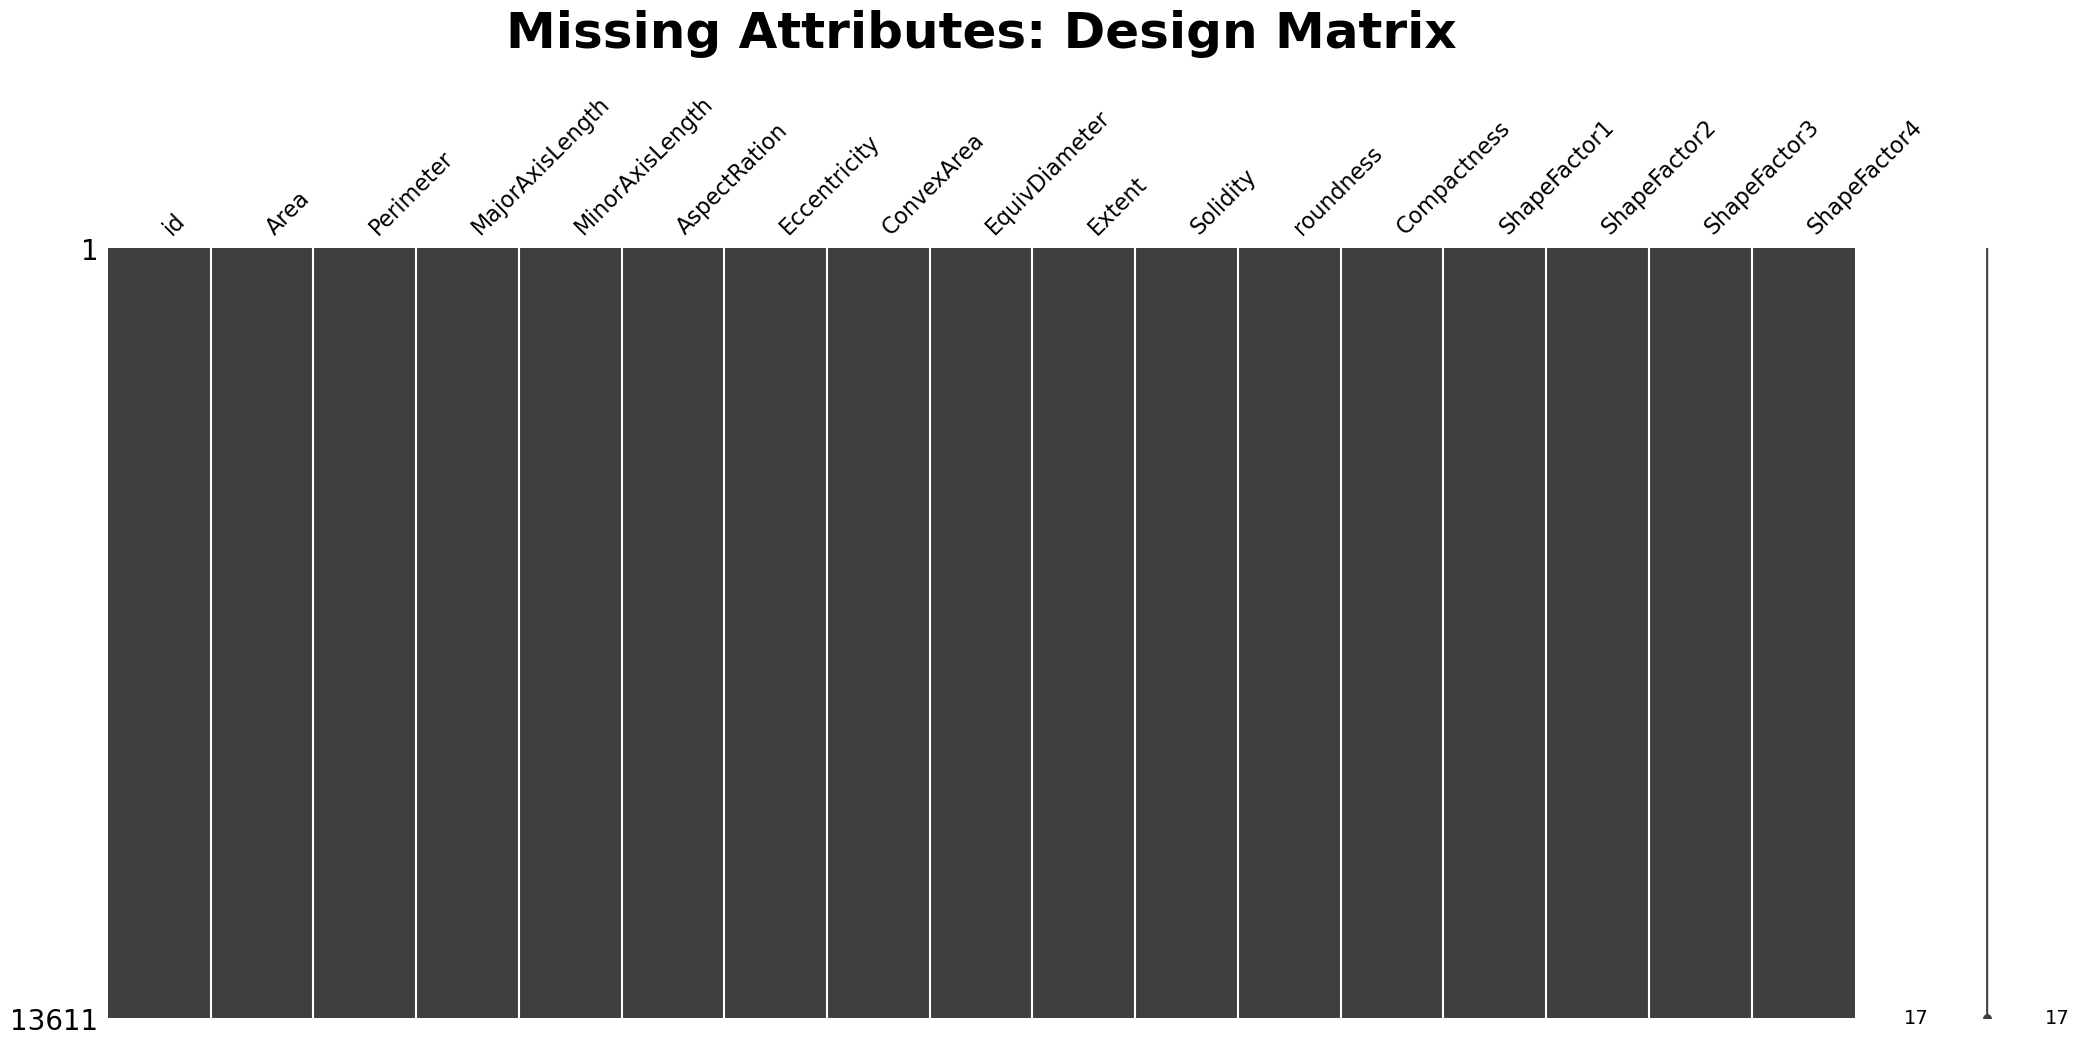

In [23]:
# display missingness visual
msno.matrix(design_df)
plt.title("Missing Attributes: Design Matrix", fontsize = 36, weight = 'bold', y = 1.25);

# save fig
plt.savefig(figs_path + "/missing_attributes_fig_1.png", bbox_inches = 'tight')

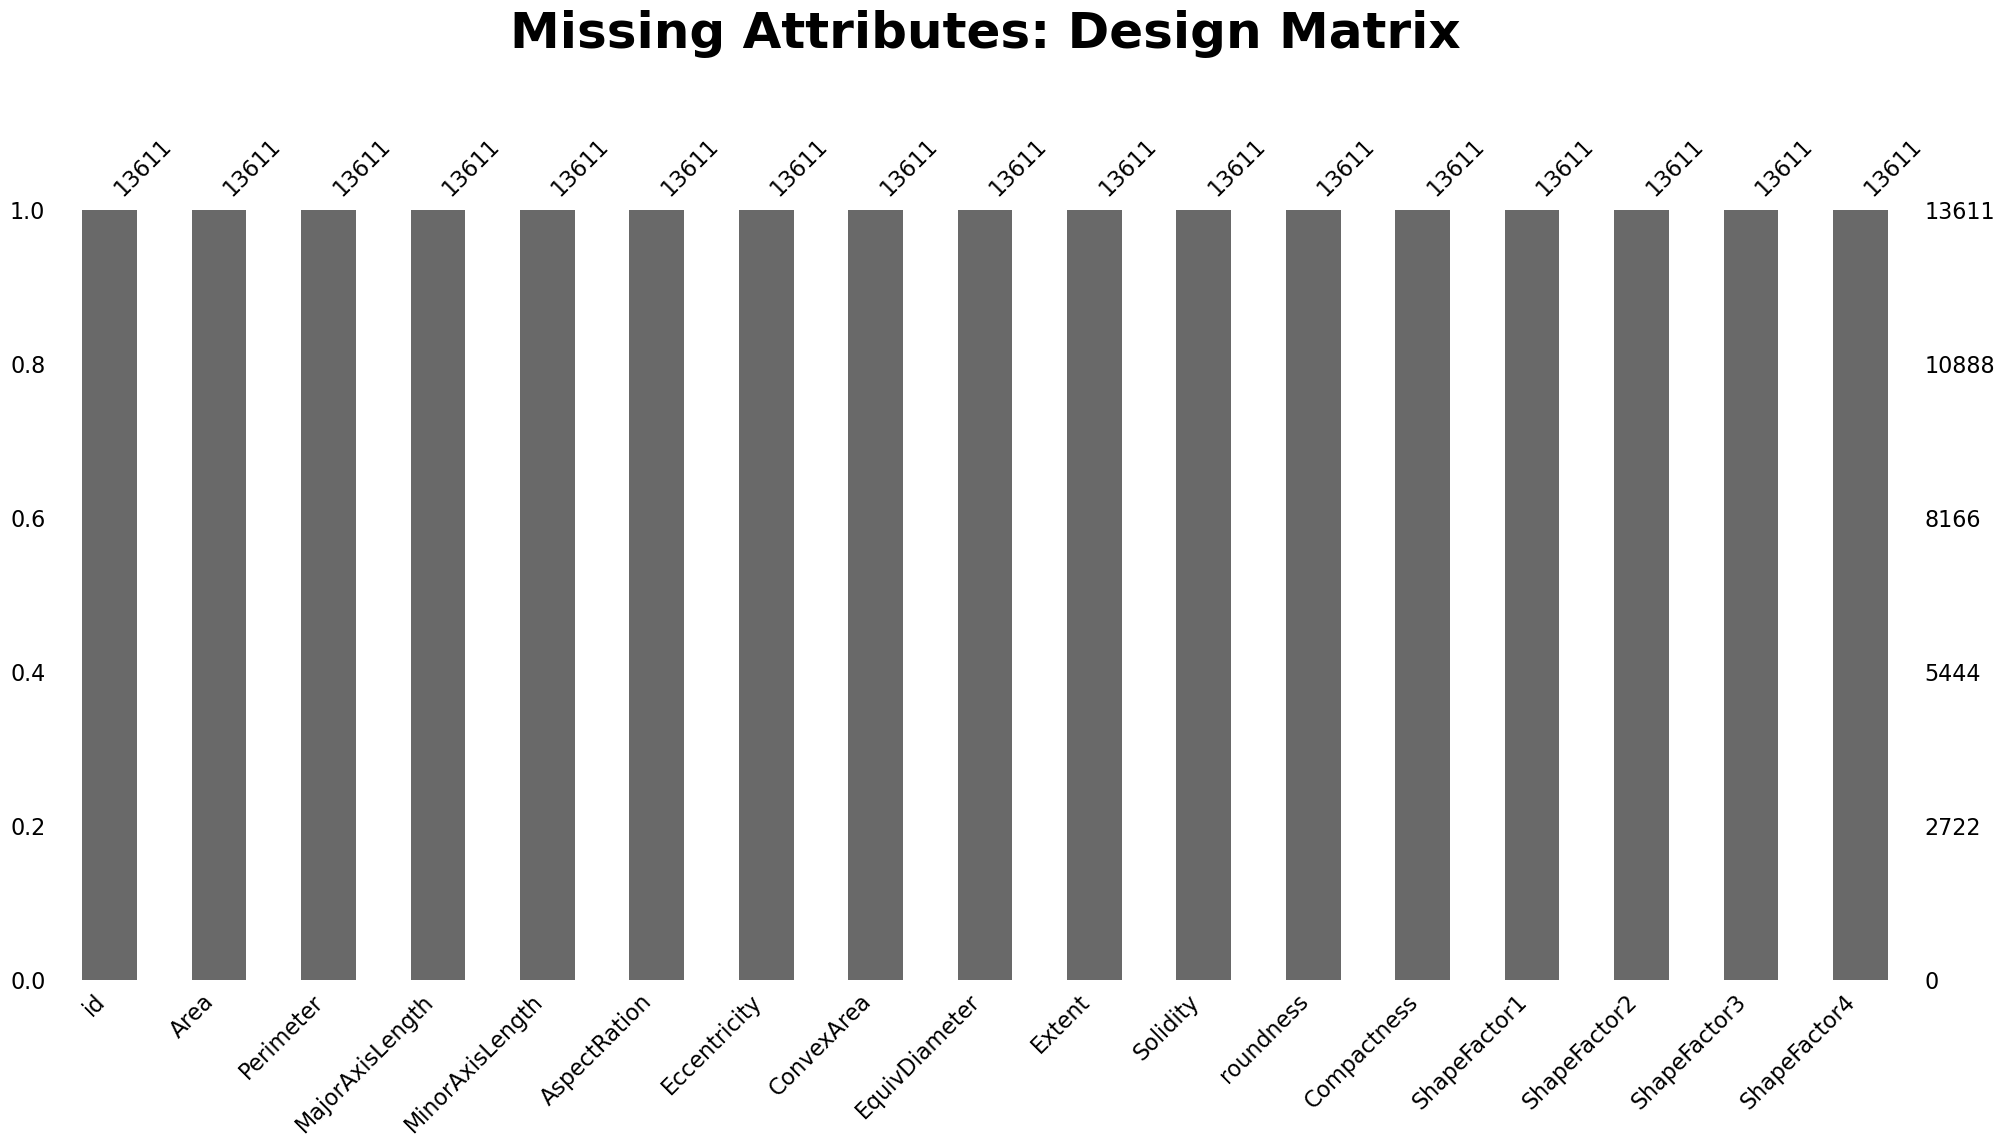

In [24]:
# display missingness visual
msno.bar(design_df)
plt.title("Missing Attributes: Design Matrix", fontsize = 36, weight = 'bold', y = 1.2);

# save fig
plt.savefig(figs_path + "/missing_attributes_fig_2.png", bbox_inches = "tight")

___
### Save The Design Matrix

In [25]:
# save the design matrix
#target_df.to_csv('/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/data/curated/beans_design.cvs')

design_df.to_csv(data_path + '/curated/beans_design.csv')
print(f"Design dataframe saved at: {data_path}/curated/beans_design.csv")

Design dataframe saved at: /Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/data/curated/beans_design.csv
